Créer un nouveau notebook Python et taper le code suivant dans une nouvelle cellule :

In [2]:
import numpy as np
np.set_printoptions(threshold=np.nan,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# 1. Chargement des données et préparation : Dans un premier temps nous allons importer le jeu de données et analyser ses caractéristiques

## • Importer ce jeu de données avec la librairie pandas (c.f. read_csv)

## • Transformer votre jeu de données issue de pandas qui sera de type Data Frame en numpy Array (c.f. values) et séparer ensuite les variables caractéristiques de la variable à prédire (status) en deux tableaux différents.

In [53]:
data_df = pd.read_csv('./credit_scoring.csv', sep=';')
data = data_df.values
#  variables caractéristiques 
X = data[:,0:13]
#  variable à prédire
Y = data[:,13]

## • Analyser les propriétés de vos données : taille de l’échantillon (c.f. shape), nombre d’exemples positifs et négatifs (c.f. hist).

In [14]:
data.shape

(4375, 14)

On a 4375 observations dans notre l’échantillon et 14 colonnes (c.à.d 13 variables caractéristiques + 1 variable à prédire)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A6C72A710>,
      dtype=object)

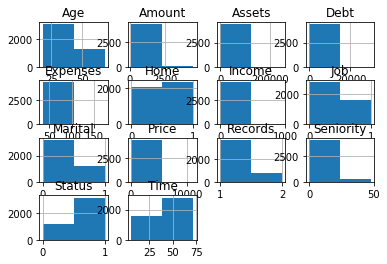

In [52]:
data_df.hist(bins = 2)

## • Pour éviter d’avoir un résultat biaisé du classifieur que nous allons construire, séparer les données en deux partie une dite d’apprentissage qui servira à l’apprentissage du classifieur et l’autre dite de test qui servira à son évaluation (c.f. train_test_split).

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

on split notre dataset en deux parties ( un tier pour le test, et deux tiers pour training)

# 2. Apprentissage et évaluation de modèles : Utiliser ensuite sur votre jeu de données les algorithmes d’apprentissage supervisé suivants :

## • Un arbre CART (random_state=1)

In [137]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("L’accuracy d'un arbre CART:", accuracy_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import precision_score
print("La precision d'un arbre CART:", precision_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import recall_score
print("Le rappel d'un arbre CART:", recall_score(Y_test, Y_pred)*100, "%")

L’accuracy d'un arbre CART: 71.26038781163435 %
La precision d'un arbre CART: 79.81132075471699 %
Le rappel d'un arbre CART: 80.80229226361033 %


## • k-plus-proches-voisins avec k=5

In [136]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("L’accuracy d'un arbre CART:", accuracy_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import precision_score
print("La precision d'un arbre CART:", precision_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import recall_score
print("Le rappel d'un arbre CART:", recall_score(Y_test, Y_pred)*100, "%")

L’accuracy d'un arbre CART: 72.02216066481995 %
La precision d'un arbre CART: 77.03952901597981 %
Le rappel d'un arbre CART: 87.48806112702961 %


Entre la presicion et le rappel, le rappel est le meilleur critère pour comparer les 2 classifications. 
Car le dénominateur du rappel est constant. Alors, on peut baser sur le numérateur pour la comparaison.

